<a href="https://colab.research.google.com/github/franco05hk/week4project/blob/main/pythonAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 requests-html

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=947c2a101505f390f8aff4181de33f38c09c70584b0d77466ba77e4349e7c759
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


In [ ]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [ ]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

In [ ]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [ ]:
def topic_detection(sentence):
    academic_words = ('bachelor', 'doctorate', 'professor', 'lecture', 'knowledge', 'student', 'literature', 'college', 'University', 'teaching')
    family_words = ('father', 'mother', 'sister', 'brother', 'children', 'wife', 'child')
    science_words = ('theoretical','laboratory','mechanics','chemistry','physics', 'physicist', 'nuclear', 'quantum', 'theory', 'scientific')
    emotion_words = ('happy')

    academic = any(sentence.count(i) > 0 for i in academic_words)
    family = any(sentence.count(i) > 0 for i in family_words)
    science = any(sentence.count(i) > 0 for i in science_words)
    topics = []
    if academic == family == science == False:
        topics.append("unclassified")
    if academic == True:
        topics.append("academic")
    if family == True:
        topics.append("family")
    if science == True:
        topics.append("science")

    return topics

In [ ]:
url = 'https://en.wikipedia.org/wiki/J._Robert_Oppenheimer#References'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [ ]:
#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
topic_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      #print((paragraphs[p].text))
      #print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}")
      p_list.append(paragraphs[p].text)
      topic_list.append(topic_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Topics'] = topic_list
p_dictionary['Topics']



[['family', 'science'],
 ['academic', 'science'],
 ['science'],
 ['academic', 'science'],
 ['academic', 'family', 'science'],
 ['family'],
 ['academic', 'science'],
 ['academic', 'science'],
 ['science'],
 ['unclassified'],
 ['family', 'science'],
 ['academic', 'science'],
 ['academic', 'science'],
 ['family'],
 ['academic', 'science'],
 ['academic'],
 ['academic', 'family', 'science'],
 ['academic', 'science'],
 ['academic', 'science'],
 ['science'],
 ['science'],
 ['academic', 'science'],
 ['academic', 'science'],
 ['science'],
 ['academic', 'science'],
 ['academic', 'science'],
 ['science'],
 ['unclassified'],
 ['academic', 'science'],
 ['academic', 'family'],
 ['unclassified'],
 ['unclassified'],
 ['unclassified'],
 ['unclassified'],
 ['academic'],
 ['academic'],
 ['family'],
 ['unclassified'],
 ['academic', 'family'],
 ['academic', 'science'],
 ['family', 'science'],
 ['academic', 'family', 'science'],
 ['unclassified'],
 ['science'],
 ['science'],
 ['academic', 'science'],
 ['sci

In [ ]:
wiki_df = pd.DataFrame(p_dictionary)
wiki_df.head(30)

,Paragraphs,Topics
0,Julius Robert Oppenheimer (/ˈɒpənhaɪmər/ OP-ən...,"[family, science]"
1,"Born in New York City, Oppenheimer earned a ba...","[academic, science]"
2,"In 1942, Oppenheimer was recruited to work on ...",[science]
3,"In 1947, Oppenheimer became the director of th...","[academic, science]"
4,J. Robert Oppenheimer[note 1] was born into a ...,"[academic, family, science]"
5,Oppenheimer was initially educated at Alcuin P...,[family]
6,"Oppenheimer was a versatile student, intereste...","[academic, science]"
7,"At age 18, Oppenheimer entered Harvard College...","[academic, science]"
8,"After being accepted at Christ's College, Camb...",[science]
9,Oppenheimer was very unhappy at Cambridge and ...,[unclassified]


In [ ]:
wiki_df['Character Count'] = wiki_df['Paragraphs'].apply(lambda x: len(x))
wiki_df['Topic Count'] = wiki_df['Topics'].apply(len)
wiki_df

,Paragraphs,Topics,Character Count,Topic Count
0,Julius Robert Oppenheimer (/ˈɒpənhaɪmər/ OP-ən...,"[family, science]",263,2
1,"Born in New York City, Oppenheimer earned a ba...","[academic, science]",875,2
2,"In 1942, Oppenheimer was recruited to work on ...",[science],531,1
3,"In 1947, Oppenheimer became the director of th...","[academic, science]",1225,2
4,J. Robert Oppenheimer[note 1] was born into a ...,"[academic, family, science]",921,3
...,...,...,...,...
123,A centennial conference about Oppenheimer's le...,[academic],327,1
124,"As a scientist, Oppenheimer was remembered by ...","[academic, science]",821,2
125,"As a military and public policy advisor, Oppen...","[academic, science]",852,2
126,"Two days before the Trinity test, Oppenheimer ...",[unclassified],121,1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
topic_amount = wiki_df['Topics'].value_counts()
print(topic_amount)
#print(list(topic_amount))
#print(list(topic_amount.keys()))

[unclassified]                 40
[science]                      35
[academic, science]            25
[academic]                      8
[family]                        6
[academic, family, science]     5
[academic, family]              5
[family, science]               4
Name: Topics, dtype: int64


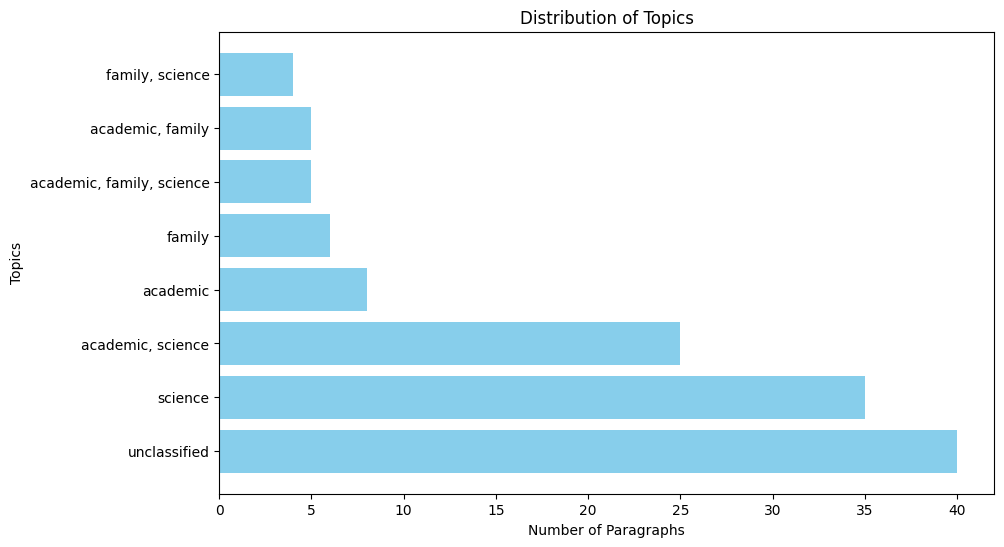

In [ ]:
import matplotlib.pyplot as plt
topic_counts = {
    'unclassified': 40,
    'science': 35,
    'academic, science': 25,
    'academic': 8,
    'family': 6,
    'academic, family, science': 5,
    'academic, family': 5,
    'family, science': 4
}

topics = list(topic_counts.keys())
counts = list(topic_counts.values())

plt.figure(figsize=(10, 6))
plt.barh(topics, counts, color='skyblue')
plt.xlabel('Number of Paragraphs')
plt.ylabel('Topics')
plt.title('Distribution of Topics')
plt.show()

In [ ]:
from bs4 import BeautifulSoup
import requests

# Example URL
url = 'https://en.wikipedia.org/wiki/J._Robert_Oppenheimer#References'

# Make a GET request to the URL
response = requests.get(url)
html_content = response.content

# Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find all paragraphs (or any other element you want to search within)
paragraphs = soup.find_all('p')

target_keyword = 'University'
# Define the number of words to capture before and after the target keyword
words_before = 1
words_after = 4

# Iterate through the paragraphs
for paragraph in paragraphs:
    text1 = paragraph.get_text()  # Get the plain text of the paragraph

    # Split the paragraph into words
    words = text1.split()

    # Find the target keyword and capture words around it
    for idx, word in enumerate(words):
        if target_keyword.lower() in word.lower():
            # Calculate the starting and ending indices for the captured words
            start_idx = max(0, idx - words_before)
            end_idx = min(len(words), idx + words_after + 1)

            # Extract the captured words
            captured_words = ' '.join(words[start_idx:end_idx])
            uni_list=[]
            uni_list.append(captured_words)
            print(uni_list)
#find out how many university is related to him
listofall=[
['Harvard University in 1925 and a'],
['the University of Göttingen in Germany'],
['the University of California, Berkeley, where'],
['the university authorities not to press'],
['the University of Göttingen to study'],
['the University of Leiden, the Netherlands,'],
['the University of California, Berkeley, where'],
['the University of California to be'],
['Stanford University School of Medicine. The'],
['the University of Pennsylvania. There, she'],
['the University of California, Los Angeles.'],
['the University of California operated the'],
['his University of Minnesota position. Unable'],
["Columbia University Bicentennial radio show Man's"],
['the university remained adamant that he'],
['the University of Washington, Henry Schmitz,'],
["the university senate, and Schmitz's decision"],
['several University of Washington faculty, but'],
['McMaster University, which were published in'],
['Princeton University. The service was attended'],
['the University of California, Berkeley, alongside']
]
number_of_lists = len(listofall)

# Print the result
print("Number of lists:", number_of_lists)





['Harvard University in 1925 and a']
['the University of Göttingen in Germany']
['the University of California, Berkeley, where']
['the university authorities not to press']
['the University of Göttingen to study']
['the University of Leiden, the Netherlands,']
['the University of California, Berkeley, where']
['the University of California to be']
['Stanford University School of Medicine. The']
['the University of Pennsylvania. There, she']
['the University of California, Los Angeles.']
['the University of California operated the']
['his University of Minnesota position. Unable']
["Columbia University Bicentennial radio show Man's"]
['the university remained adamant that he']
['the University of Washington, Henry Schmitz,']
["the university senate, and Schmitz's decision"]
['several University of Washington faculty, but']
['McMaster University, which were published in']
['Princeton University. The service was attended']
['the University of California, Berkeley, alongside']
Number of l

<br>Harvard University            
<br>University of Göttingen in Germany  
<br>University of California, Berkeley  
<br>university authorities (useless info)
<br>University of Göttingen
<br>University of Leiden, the Netherlands
<br>University of California, Berkeley (repeated)
<br>University of California (repeated)
<br>Stanford University School of Medicine
<br>University of Pennsylvania
<br>University of California (repeated)
<br>University of California (repeated)
<br>University of Minnesota
<br>Columbia University Bicentennial radio
<br>the university (useless info)
<br>the University of Washington
<br>the university senate (useless info)
<br>everal University of Washington faculty (useless info)
<br>McMaster University
<br><br>Princeton University
<br>the University of California, Berkeley (repeated)

--total in 12/21 valid uni

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/J._Robert_Oppenheimer#References'

# Make a GET request to the URL
response = requests.get(url)
html_content = response.content

# Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find the "References" section
references_section = soup.find('span', {'id': 'References'})

# Find the following <ul> element containing the book list
book_list_ul = references_section.find_next('ul')

# Find all <li> elements within the <ul> for book titles
book_titles = book_list_ul.find_all('li')

# Count the number of books
book_count = len(book_titles)

# Create a list to store book titles
book_titles_list = [book.get_text(strip=True) for book in book_titles]

# Print the book count and the list of book titles
print(f"Number of books: {book_count}")
print("List of book titles:")
for title in book_titles_list:
    print(title)

references_section = soup.find('span', {'id': 'References'})

# Find the following <ul> element containing the book list
book_list_ul = references_section.find_next('ul')

# Find all <li> elements within the <ul> for book titles
book_titles = book_list_ul.find_all('li')

# Count the number of books
book_count = len(book_titles)

# Create a list to store book titles
book_titles_list = [book.get_text(strip=True) for book in book_titles]

# Print the book count and the list of book titles
print(f"Number of books: {book_count}")
print("List of book titles:")
for title in book_titles_list:
    print(title)


Number of books: 43
List of book titles:
Anderson, Leif E.; Whitaker, Ewen A. (1982).NASA Catalogue of Lunar Nomenclature(PDF). Springfield, Virginia:National Aeronautics and Space Administration.
Bethe, Hans(1968b).The Road from Los Alamos. New York:Springer Science+Business Media.ISBN978-0-88318-707-4.
Bird, Kai;Sherwin, Martin J.(2005).American Prometheus: The Triumph and Tragedy of J. Robert Oppenheimer. New York: Alfred A. Knopf.ISBN978-0-375-41202-8.
Bundy, McGeorge(1988).Danger and Survival: Choices About the Bomb in the First Fifty Years. New York: Random House.ISBN978-0-394-52278-4.
Carson, Cathryn(2005). "§Introduction". In Carson, Cathryn; Hollinger, David A. (eds.).Reappraising Oppenheimer: Centennial Studies and Reflections. Berkeley, California: Office for History of Science and Technology, University of California. pp. 1–10.ISBN978-0-9672617-3-7.
Cassidy, David C.(2005).J. Robert Oppenheimer and the American Century. New York: Pi Press.ISBN978-0-13-147996-8.
Childs, Herb

In [ ]:
pip install transformers

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from textblob import TextBlob

# Assuming you have defined the paragraphs list
# paragraphs = ... (list of paragraph texts)

# Create a dictionary to store paragraphs, their sentiments, and their corresponding topics
p_dictionary = {'Paragraphs': [], 'Sentiments': [], 'Topics': []}

# Loop through paragraphs and analyze sentiments and topics
for paragraph_text in paragraphs:
    if len(paragraph_text) > 10:
        # Ensure paragraph_text is a valid string
        paragraph_text = paragraph_text.get_text() if hasattr(paragraph_text, 'get_text') else paragraph_text

        # Perform sentiment analysis using TextBlob
        blob = TextBlob(paragraph_text)
        sentiment_score = blob.sentiment.polarity

        # Determine sentiment label based on the polarity score
        sentiment_label = "positive" if sentiment_score > 0 else "negative" if sentiment_score < 0 else "neutral"

        # For simplicity, let's assume you're not using any topic detection function here
        # Replace the following with your topic detection logic

        # Example: Assuming you're detecting topics based on the presence of specific keywords
        detected_topics = []
        if "technology" in paragraph_text:
            detected_topics.append("Technology")
        if "environment" in paragraph_text:
            detected_topics.append("Environment")
        if "university" in paragraph_text:
            detected_topics.append("university")
        if "work" in paragraph_text:
            detected_topics.append("work")
        if "bomb" in paragraph_text:
            detected_topics.append("bomb")

        # Add more topic detection logic as needed

        # Append paragraph, sentiment, topics to the dictionary
        p_dictionary['Paragraphs'].append(paragraph_text)
        p_dictionary['Sentiments'].append({"Label": sentiment_label, "Score": sentiment_score})
        p_dictionary['Topics'].append(detected_topics)

        # Print the paragraph, sentiment, and detected topics
        print(paragraph_text)
        print(f"Sentiment: {sentiment_label}, Score: {sentiment_score}")
        print(f"TALKS ABOUT: {detected_topics}")

# Print the dictionary of paragraphs, sentiments, and topics (optional)
print(p_dictionary)


NameError: ignored

RE: findings

Regarding rule-based categorization, it was observed that a significant portion of paragraphs remained unclassified, while the second most common topic revolved around science. The third category often combined elements of science and academia. It's noteworthy that the application of rule-based systems for categorization encounters limitations. The process of assigning categories based on keywords may not entirely capture the essence of paragraphs, given the dynamic nature of language and diverse expressions. Relying solely on rule-based sorting can be challenging and might necessitate more effort in developing a robust system compared to thorough manual reading.

Analyzing the character count and topic distribution per paragraph provides insights into the author's writing patterns, revealing whether they prefer to include multiple topics or focus on one or two. However, this approach's effectiveness hinges on the quality of the rule-based system. While it provides valuable insights, AI-powered tools are poised to outperform it.

Chart analysis demonstrates a pronounced emphasis on science-related topics, aligning with expectations given Oppenheimer's scientific achievements. Notably, most paragraphs encompass fewer than three topics, reflecting Oppenheimer's renown in the scientific sphere and minimal overlap with his personal life, family, and academic pursuits.

The analysis reveals approximately 45 cited books, making the page a "TL;DR" scenario. However, challenges arise in extracting valuable information from lists like books and universities. While computers can compile relevant details, eliminating irrelevant data requires manual intervention. Extracting 12 valid universities out of 21, while accounting for writer's names attached as part of book titles, underscores the need for human oversight.

Sentiment analysis appears less applicable to documentary writing due to its neutral tone. This characteristic leads to limited accuracy in analysis, as emotional expression is uncommon. Nevertheless, the technique holds promise for financial news analysis, where sentiment influences financial indicators such as stock prices.